# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erahm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Read your api key environment variable
api_key = os.getenv("news_api")
api_key

In [17]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [18]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin", 
    language="en", 
    sort_by="relevancy")

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 7332


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'If you’re a Russian YouTuber, how do you get paid now?',
 'description': 'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.',
 'url': 'https://www.theverge.com/2022/3/17/22982122/russia-youtube-crypto-creators-pay-ruble',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3S_LG-y-r7iPmg=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/9442221/cryptocurrency_0004__00000_.jpg',
 'publishedAt': '2022-03-17T13:33:43Z',
 'content': 'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]'}

In [19]:
# Fetch all the news about Ethereum
ethereum_headlines = newsapi.get_everything(
    q="Ethereum", 
    language="en", 
    sort_by="relevancy")

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]


Total articles about Ethereum: 3553


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Shanti Escalante-De Mattei',
 'title': 'Web3 Threatens to Segregate Our Online Lives',
 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
 'publishedAt': '2022-03-01T14:00:00Z',
 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}

In [20]:
# Transform the response dictionary to a DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines["articles"])
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,https://www.theverge.com/2022/3/17/22982122/ru...,https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3...,2022-03-17T13:33:43Z,"When Russia invaded Ukraine, Niki Proshin was ..."
1,"{'id': None, 'name': 'Slashdot.org'}",EditorDavid,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...",https://news.slashdot.org/story/22/03/12/05412...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-03-12T18:34:00Z,"""Bitcoin was seen by many of its libertarian-l..."
2,"{'id': 'reuters', 'name': 'Reuters'}",None,CRYPTOVERSE-Bitcoin could be laid low by miner...,Bitcoin miners are feeling the heat - and the ...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/resizer/9nBpgfg7pSfpPQ...,2022-02-22T06:17:00Z,Feb 22 (Reuters) - Bitcoin miners are feeling ...
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/pf/resources/images/re...,2022-03-01T06:10:00Z,March 1 (Reuters) - Bitcoin has leapt since Ru...
4,"{'id': 'wired', 'name': 'Wired'}",Gian M. Volpicelli,War Is Calling Crypto’s ‘Neutrality’ Into Ques...,War in Ukraine and Western sanctions against R...,https://www.wired.com/story/crypto-russia-ukra...,https://media.wired.com/photos/6226a83bd53a49d...,2022-03-08T12:00:00Z,Whose side is cryptocurrency on? If you had as...


In [92]:
# Transform the response dictionary to a DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum_headlines["articles"])
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Shanti Escalante-De Mattei,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,https://www.wired.com/story/web3-governance-to...,https://media.wired.com/photos/621d66c7ea3b8f2...,2022-03-01T14:00:00Z,"In February, shit hit the fan in the usual way..."
1,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/62190267d0009b001904bd96...,2022-02-25T17:02:30Z,Coinbase reported that the share of trading vo...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
3,"{'id': 'wired', 'name': 'Wired'}",Omar L. Gallaga,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,https://www.wired.com/story/how-to-make-money-...,https://media.wired.com/photos/622bcc6ef48a924...,2022-03-13T13:00:00Z,"If it sounds too good to be true, youre not wr..."
4,"{'id': None, 'name': 'Entrepreneur'}",Masha Prusso,What You Need to Know About Ethereum's Role in...,This now-seven-year-old decentralized and open...,https://www.entrepreneur.com/article/417850,https://assets.entrepreneur.com/content/3x2/20...,2022-03-03T16:00:00Z,"It seems that in 2022, you cant escape from th..."


In [22]:
# Create the Bitcoin sentiment scores DataFrame
_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        _sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiment_scores_df = pd.DataFrame(_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiment_scores_df = bitcoin_sentiment_scores_df[cols]

bitcoin_sentiment_scores_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
2,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854


In [23]:
# Create the Ethereum sentiment scores DataFrame
_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        _sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sentiment_scores_df = pd.DataFrame(_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_sentiment_scores_df = ethereum_sentiment_scores_df[cols]

ethereum_sentiment_scores_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713
4,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956


In [24]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_scores_df.describe()

# Based on the Bitcoin Sentiment analysis, the overarching theme is neutral per the mean score of 91% in the 'describe' analysis below. 

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.001295,0.047700,0.043750,0.908500
std,0.406381,0.045767,0.061198,0.071992
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.231275,0.000000,0.000000,0.861500
50%,0.000000,0.051500,0.000000,0.918000
75%,0.345300,0.075750,0.071000,0.952500
max,0.636900,0.152000,0.187000,1.000000


In [25]:
# Describe the Ethereum Sentiment
ethereum_sentiment_scores_df.describe()

# Based on the Ethereum Sentiment analysis below, the overarching theme is also neutral per the mean score of 90% in the 'describe' analysis below.

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.190925,0.078750,0.02975,0.89145
std,0.401422,0.085383,0.04006,0.10092
min,-0.526700,0.000000,0.00000,0.69200
25%,0.000000,0.000000,0.00000,0.84100
50%,0.025800,0.066500,0.00000,0.91050
75%,0.514625,0.120500,0.06125,1.00000
max,0.834000,0.249000,0.11500,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score at 7%.

Q: Which coin had the highest compound score?

A: Ethereum also had the highest compound score at 16%.

Q. Which coin had the highest positive score?

A: Ethereum's max positive score of 25% far exceeded Bitcoin's max positive score of 15%.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.corpus import reuters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\erahm\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erahm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
# Select a specific article from the bitcoin dataframe
bitcoin_article = pd.DataFrame.from_dict(bitcoin_headlines["articles"])
display(bitcoin_df.iloc[5])

source         {'id': 'business-insider', 'name': 'Business I...
author                    mfox@businessinsider.com (Matthew Fox)
title          NFT sales fall to $237 million over the past w...
description    Total NFT sales volume hit $23 billion over th...
url            https://markets.businessinsider.com/news/curre...
urlToImage     https://i.insider.com/620562e73b86990018b2c4cb...
publishedAt                                 2022-03-02T15:35:45Z
content        The cryptocurrency boom over the past few year...
Name: 5, dtype: object

In [106]:
# Select a specific article from the ethereum dataframe
ethereum_article = pd.DataFrame.from_dict(ethereum_headlines["articles"])
display(ethereum_df.iloc[3])

source                          {'id': 'wired', 'name': 'Wired'}
author                                           Omar L. Gallaga
title          How People Actually Make Money From Cryptocurr...
description    Power traders use “staking” and “yield farming...
url            https://www.wired.com/story/how-to-make-money-...
urlToImage     https://media.wired.com/photos/622bcc6ef48a924...
publishedAt                                 2022-03-13T13:00:00Z
content        If it sounds too good to be true, youre not wr...
Name: 3, dtype: object

In [107]:
# Grab the description column in the bitcoin article and convert to a csv file
bitcoin_article_description = bitcoin_article['description'].to_csv(index=False)
bitcoin_article_description

'description\r\nRussian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.\r\n"""Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance,"" argues a columnist in the New York Times, ""a form of \'digital gold\' that would be a source of stability as the world grew more chaotic and unpredictable.... \n\n""But Bit…"\r\nBitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices.\r\n"Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and move money in anonymous and decentralised crypto."\r\nWar in Ukraine and Western sanctions against Russia have made cryptocurrency a hot potato for international politics.\r\n"Nonfungible Tidbits: All the bitcoin, cryptocurrency and NFT news for the week ending March 6."\r\n"Nonfungible Tidbits: All the bitcoin, cryptocurrency and NFT news for the week ending March 18."\r\nAn appeals

In [108]:
# Grab the description column in the ethereum article and convert to a csv file
ethereum_article_description = ethereum_article['description'].to_csv(index=False)
ethereum_article_description

'description\r\nGovernance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.\r\n"Ethereum trading volume increased from 15% to 21% of Coinbase\'s total, and altcoins increased from 44% to 55%. Bitcoin dropped from 41% to 24%."\r\nMillions of dollars of cryptocurrency have flowed into Ukraine after it was attacked by Russia. Crypto was already popular — and proponents say it gets donations to those in need faster.\r\n"Power traders use “staking” and “yield farming” to generate passive income, but there are risks."\r\nThis now-seven-year-old decentralized and open-source blockchain has taken center stage in the growing metaverse.\r\n"Total NFT sales volume hit $23 billion over the past year as artists, investors, and entrepreneurs descend upon the nascent Web3 space."\r\n"A dispatch from a dizzying week at one of North America\'s largest cryptocurrency conferences, featuring Ethereum founder Vitalik Buterin and Andrew Yan

In [118]:
# Use NLTK's sent_tokenize function to loop through article to tokenize all sentences in bitcoin article
bitcoin_sentences = sent_tokenize(bitcoin_article_description)
bitcoin_sentences

['description\r\nRussian creators are shut off from the global financial system.',
 'Some of them are turning to cryptocurrency.',
 '"""Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance,"" argues a columnist in the New York Times, ""a form of \'digital gold\' that would be a source of stability as the world grew more chaotic and unpredictable.... \n\n""But Bit…"\r\nBitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices.',
 '"Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and move money in anonymous and decentralised crypto."',
 'War in Ukraine and Western sanctions against Russia have made cryptocurrency a hot potato for international politics.',
 '"Nonfungible Tidbits: All the bitcoin, cryptocurrency and NFT news for the week ending March 6."',
 '"Nonfungible Tidbits: All the bitcoin, cryptocurrency and NFT news for the week ending March 18."',
 

In [117]:
# Use NLTK's sent_tokenize function to loop through article to tokenize all sentences in ethereum article
ethereum_sentences = sent_tokenize(ethereum_article_description)
ethereum_sentences

['description\r\nGovernance tokens seem like a tantalizing solution to content moderation struggles.',
 'They only give the appearance of democracy.',
 '"Ethereum trading volume increased from 15% to 21% of Coinbase\'s total, and altcoins increased from 44% to 55%.',
 'Bitcoin dropped from 41% to 24%."',
 'Millions of dollars of cryptocurrency have flowed into Ukraine after it was attacked by Russia.',
 'Crypto was already popular — and proponents say it gets donations to those in need faster.',
 '"Power traders use “staking” and “yield farming” to generate passive income, but there are risks."',
 'This now-seven-year-old decentralized and open-source blockchain has taken center stage in the growing metaverse.',
 '"Total NFT sales volume hit $23 billion over the past year as artists, investors, and entrepreneurs descend upon the nascent Web3 space."',
 '"A dispatch from a dizzying week at one of North America\'s largest cryptocurrency conferences, featuring Ethereum founder Vitalik But

In [142]:
# Use NLTK's sent_tokenize function to loop through article to tokenize all words in bitcoin article
bitcoin_tokens = word_tokenize(bitcoin_article_description)
bitcoin_tokens

['description',
 'Russian',
 'creators',
 'are',
 'shut',
 'off',
 'from',
 'the',
 'global',
 'financial',
 'system',
 '.',
 'Some',
 'of',
 'them',
 'are',
 'turning',
 'to',
 'cryptocurrency',
 '.',
 '``',
 '``',
 "''",
 'Bitcoin',
 'was',
 'seen',
 'by',
 'many',
 'of',
 'its',
 'libertarian-leaning',
 'fans',
 'as',
 'a',
 'kind',
 'of',
 'doomsday',
 'insurance',
 ',',
 "''",
 "''",
 'argues',
 'a',
 'columnist',
 'in',
 'the',
 'New',
 'York',
 'Times',
 ',',
 '``',
 "''",
 'a',
 'form',
 'of',
 "'digital",
 'gold',
 "'",
 'that',
 'would',
 'be',
 'a',
 'source',
 'of',
 'stability',
 'as',
 'the',
 'world',
 'grew',
 'more',
 'chaotic',
 'and',
 'unpredictable',
 '....',
 "''",
 "''",
 'But',
 'Bit…',
 "''",
 'Bitcoin',
 'miners',
 'are',
 'feeling',
 'the',
 'heat',
 '-',
 'and',
 'the',
 'pain',
 "'s",
 'rippling',
 'downstream',
 'to',
 'pressure',
 'prices',
 '.',
 '``',
 'Bitcoin',
 'has',
 'leapt',
 'since',
 'Russia',
 "'s",
 'invasion',
 'of',
 'Ukraine',
 ',',
 'bolst

In [145]:
# Use NLTK's sent_tokenize function to loop through article to tokenize all words in ethereum article
ethereum_tokens = word_tokenize(ethereum_article_description)
ethereum_tokens

['description',
 'Governance',
 'tokens',
 'seem',
 'like',
 'a',
 'tantalizing',
 'solution',
 'to',
 'content',
 'moderation',
 'struggles',
 '.',
 'They',
 'only',
 'give',
 'the',
 'appearance',
 'of',
 'democracy',
 '.',
 '``',
 'Ethereum',
 'trading',
 'volume',
 'increased',
 'from',
 '15',
 '%',
 'to',
 '21',
 '%',
 'of',
 'Coinbase',
 "'s",
 'total',
 ',',
 'and',
 'altcoins',
 'increased',
 'from',
 '44',
 '%',
 'to',
 '55',
 '%',
 '.',
 'Bitcoin',
 'dropped',
 'from',
 '41',
 '%',
 'to',
 '24',
 '%',
 '.',
 "''",
 'Millions',
 'of',
 'dollars',
 'of',
 'cryptocurrency',
 'have',
 'flowed',
 'into',
 'Ukraine',
 'after',
 'it',
 'was',
 'attacked',
 'by',
 'Russia',
 '.',
 'Crypto',
 'was',
 'already',
 'popular',
 '—',
 'and',
 'proponents',
 'say',
 'it',
 'gets',
 'donations',
 'to',
 'those',
 'in',
 'need',
 'faster',
 '.',
 '``',
 'Power',
 'traders',
 'use',
 '“',
 'staking',
 '”',
 'and',
 '“',
 'yield',
 'farming',
 '”',
 'to',
 'generate',
 'passive',
 'income',
 ',

In [146]:
# Sentence tokenize stores in bitcoin_df
sentence_tokenized_bitcoin = [sent_tokenize(id) for id in bitcoin_df]

In [63]:
# Sentence tokenize stores in ethereum_df
sentence_tokenized_ethereum = [sent_tokenize(id) for id in ethereum_df]

In [64]:
# Word tokenize all bitcoin sentences
word_tokenized_bitcoin = []

for story in sentence_tokenized_bitcoin:
    words = []
    for sent in story:
        words = words + word_tokenize(sent)
    word_tokenized_bitcoin.append(words)

In [69]:
# Word tokenize all ethereum sentences
word_tokenized_ethereum = []

for story in sentence_tokenized_ethereum:
    words = []
    for sent in story:
        words = words + word_tokenize(sent)
    word_tokenized_ethereum.append(words)


[['source'],
 ['author'],
 ['title'],
 ['description'],
 ['url'],
 ['urlToImage'],
 ['publishedAt'],
 ['content'],
 ['id']]

In [149]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [150]:
# Expand the default stopwords list 
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
sw_addons

{'also',
 'announced',
 'basically',
 'found',
 'including',
 'said',
 'sent',
 'today',
 'week'}

In [230]:
# Complete the tokenizer function
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [157]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

In [ ]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

In [ ]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [161]:
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
import spacy
from nltk.corpus import reuters
from spacy import displacy
import matplotlib.pyplot as plt 

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

In [163]:
# Set ethereum article to be analyzed with spaCy
ethereum_doc = nlp(ethereum_article_description)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc, style="ent")

In [185]:
# Join text into a single string and print the number of words in the Ethereum article content
ethereum_text = " ".join(review for review in ethereum_article.description.astype(str))
print("There are {} words in the column 'Description' of the Ethereum article.".format(len(ethereum_text)))

There are 3191 words in the column 'Description' of the Ethereum article.


In [176]:
# Define a set of stopwords using `stopwords.words()`
sw = set(stopwords.words('english'))
    
# Create custom stopwords
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

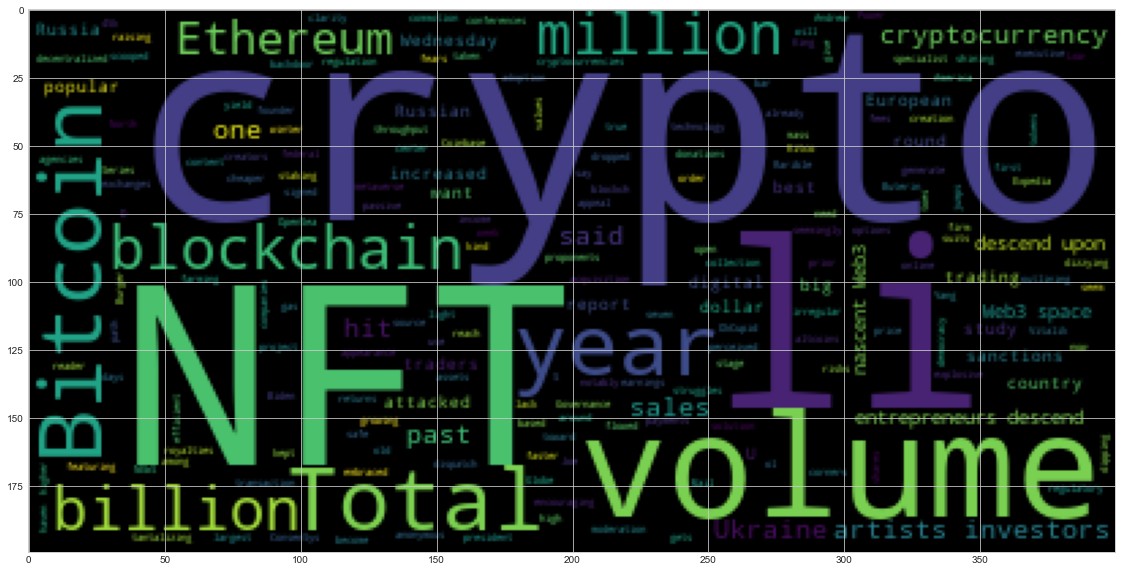

In [182]:
# Generate the Ethereum wordcloud
ethereum_wc = WordCloud().generate((text))
plt.imshow(ethereum_wc)

In [183]:
# Set bitcoin article to be analyzed with spaCy
bitcoin_doc = nlp(bitcoin_article_description)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc, style="ent")

In [184]:
# Join text into a single string and print the number of words in the Ethereum article content
bitcoin_text = " ".join(review for review in bitcoin_article.description.astype(str))
print("There are {} words in the column 'Description' of the Bitcoin article.".format(len(bitcoin_text)))

There are 3445 words in the column 'Description' of the Bitcoin article.


In [186]:
# Define a set of stopwords using `stopwords.words()`
sw = set(stopwords.words('english'))
    
# Create custom stopwords
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

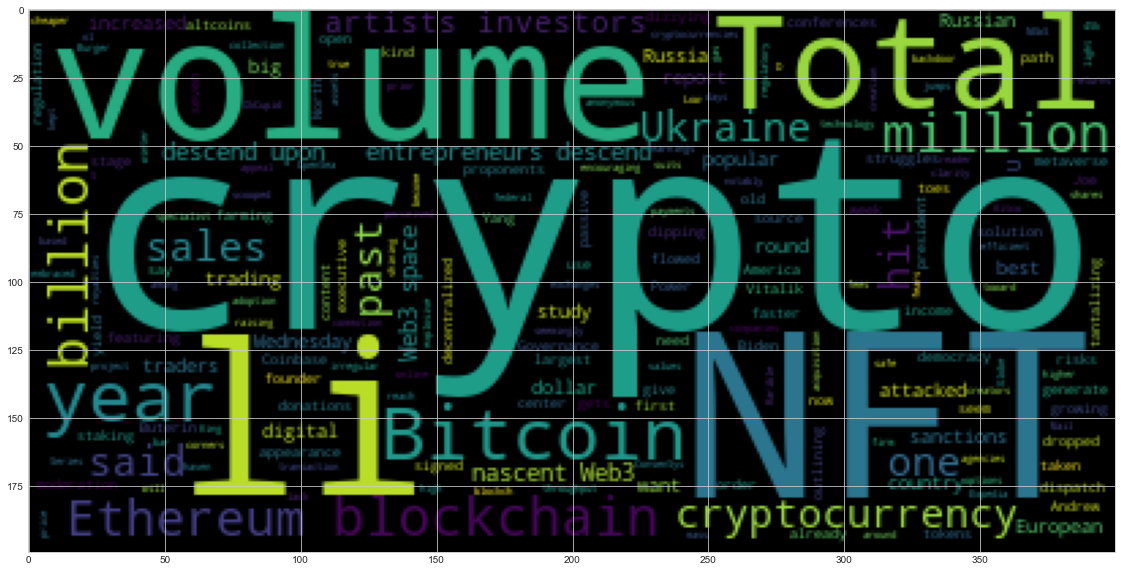

In [187]:
# Generate the Bitcoin wordcloud
bitcoin_wc = WordCloud().generate((text))
plt.imshow(bitcoin_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [190]:
# Import required libraries
import spacy
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()

True

In [191]:
# Load the English language model for spaCy
#!Python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [192]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erahm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [193]:
# Read in the News API key enviroment variable
api_key = os.getenv("news_api")

In [194]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [197]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    #q="facebook AND libra",
    q="Bitcoin",    
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles: {headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles: 3559


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'If you’re a Russian YouTuber, how do you get paid now?',
 'description': 'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency.',
 'url': 'https://www.theverge.com/2022/3/17/22982122/russia-youtube-crypto-creators-pay-ruble',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3S_LG-y-r7iPmg=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/9442221/cryptocurrency_0004__00000_.jpg',
 'publishedAt': '2022-03-17T13:33:43Z',
 'content': 'When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]'}

In [198]:
# Fetch all the news about Ethereum
ethereum_headlines = newsapi.get_everything(
    #q="facebook AND libra",
    q="Ethereum",    
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles: {headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles: 3559


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Shanti Escalante-De Mattei',
 'title': 'Web3 Threatens to Segregate Our Online Lives',
 'description': 'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy.',
 'url': 'https://www.wired.com/story/web3-governance-tokens-cryptocurrency-content-moderation/',
 'urlToImage': 'https://media.wired.com/photos/621d66c7ea3b8f283853aa29/191:100/w_1280,c_limit/Web3-Threatens-to-Segregate-Our-Online-Lives.jpg',
 'publishedAt': '2022-03-01T14:00:00Z',
 'content': 'In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]'}

---
### Bitcoin NER

In [225]:
# Select a specific article from the ethereum dataframe
bitcoin_articles = pd.DataFrame.from_dict(bitcoin_headlines["articles"])
display(bitcoin_articles)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,https://www.theverge.com/2022/3/17/22982122/ru...,https://cdn.vox-cdn.com/thumbor/MG_NhB7wSIBIl3...,2022-03-17T13:33:43Z,"When Russia invaded Ukraine, Niki Proshin was ..."
1,"{'id': None, 'name': 'Slashdot.org'}",EditorDavid,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...",https://news.slashdot.org/story/22/03/12/05412...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2022-03-12T18:34:00Z,"""Bitcoin was seen by many of its libertarian-l..."
2,"{'id': 'reuters', 'name': 'Reuters'}",None,CRYPTOVERSE-Bitcoin could be laid low by miner...,Bitcoin miners are feeling the heat - and the ...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/resizer/9nBpgfg7pSfpPQ...,2022-02-22T06:17:00Z,Feb 22 (Reuters) - Bitcoin miners are feeling ...
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,https://www.reuters.com/markets/europe/cryptov...,https://www.reuters.com/pf/resources/images/re...,2022-03-01T06:10:00Z,March 1 (Reuters) - Bitcoin has leapt since Ru...
4,"{'id': 'wired', 'name': 'Wired'}",Gian M. Volpicelli,War Is Calling Crypto’s ‘Neutrality’ Into Ques...,War in Ukraine and Western sanctions against R...,https://www.wired.com/story/crypto-russia-ukra...,https://media.wired.com/photos/6226a83bd53a49d...,2022-03-08T12:00:00Z,Whose side is cryptocurrency on? If you had as...
...,...,...,...,...,...,...,...,...
95,"{'id': 'vice-news', 'name': 'Vice News'}","Ekin Genç, Jordan Pearson",The 'Freedom Convoy' Bitcoin Donations Have Be...,Bitcoin was supposed to be a financial lifelin...,https://www.vice.com/en/article/jgmnpd/the-fre...,https://video-images.vice.com/articles/6230aaa...,2022-03-15T15:12:48Z,As Canadian protests against vaccine mandates ...
96,"{'id': None, 'name': 'Kitco NEWS'}",http://www.facebook.com/kitconews,"Gold, silver up but lose most of strong early ...","<ol><li>Gold, silver up but lose most of stron...",https://www.kitco.com/news/2022-02-24/Gold-sil...,https://www.kitco.com/news/2022-02-24/images/g...,2022-02-24T18:00:00Z,"Editor's Note: With so much market volatility,..."
97,"{'id': None, 'name': 'Kitco NEWS'}",http://www.facebook.com/kitconews,Gold closes above $1900 as the geopolitical te...,<ol><li>Gold closes above $1900 as the geopoli...,https://www.kitco.com/commentaries/2022-02-23/...,https://www.kitco.com/commentaries/2022-02-23/...,2022-02-23T23:02:00Z,Gold continues to find support at $1900 per ou...
98,"{'id': None, 'name': 'Yahoo Entertainment'}",Yvonne Yue Li,Gold Tumbles Amid Weaker-Than-Expected U.S. Sa...,<ol><li>Gold Tumbles Amid Weaker-Than-Expected...,https://ca.finance.yahoo.com/news/gold-climbs-...,https://s.yimg.com/ny/api/res/1.2/S3t4niX9DHYP...,2022-02-24T20:25:40Z,(Bloomberg) -- Gold tumbled after earlier surg...


In [226]:
# Grab description column in bitcoin article and convert to a csv file
bitcoin_articles_description = bitcoin_articles['description']
bitcoin_articles_description


0     Russian creators are shut off from the global ...
1     "Bitcoin was seen by many of its libertarian-l...
2     Bitcoin miners are feeling the heat - and the ...
3     Bitcoin has leapt since Russia's invasion of U...
4     War in Ukraine and Western sanctions against R...
                            ...                        
95    Bitcoin was supposed to be a financial lifelin...
96    <ol><li>Gold, silver up but lose most of stron...
97    <ol><li>Gold closes above $1900 as the geopoli...
98    <ol><li>Gold Tumbles Amid Weaker-Than-Expected...
99    The investor's company has racked up unrealize...
Name: description, Length: 100, dtype: object

In [227]:
# Concatenate all of the Bitcoin text together
concatentated_bitcoin_text = " ".join(review for review in bitcoin_articles_description.astype(str))
concatentated_bitcoin_text

'Russian creators are shut off from the global financial system. Some of them are turning to cryptocurrency. "Bitcoin was seen by many of its libertarian-leaning fans as a kind of doomsday insurance," argues a columnist in the New York Times, "a form of \'digital gold\' that would be a source of stability as the world grew more chaotic and unpredictable.... \n\n"But Bit… Bitcoin miners are feeling the heat - and the pain\'s rippling downstream to pressure prices. Bitcoin has leapt since Russia\'s invasion of Ukraine, bolstered by people in those countries looking to store and move money in anonymous and decentralised crypto. War in Ukraine and Western sanctions against Russia have made cryptocurrency a hot potato for international politics. Nonfungible Tidbits: All the bitcoin, cryptocurrency and NFT news for the week ending March 6. Nonfungible Tidbits: All the bitcoin, cryptocurrency and NFT news for the week ending March 18. An appeals court ruled that promoting unregistered securit

In [228]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(concatentated_bitcoin_text)

# Render NER visualization with displacy
displacy.render(doc, style='ent')

In [229]:
# List all Entities
for token in bitcoin_doc:
    print(token.text, token.ent_iob_, token.ent_type_)

Russian B NORP
creators O 
are O 
shut O 
off O 
from O 
the O 
global O 
financial O 
system O 
. O 
Some O 
of O 
them O 
are O 
turning O 
to O 
cryptocurrency O 
. O 
" O 
Bitcoin O 
was O 
seen O 
by O 
many O 
of O 
its O 
libertarian O 
- O 
leaning O 
fans O 
as O 
a O 
kind O 
of O 
doomsday O 
insurance O 
, O 
" O 
argues O 
a O 
columnist O 
in O 
the B ORG
New I ORG
York I ORG
Times I ORG
, O 
" O 
a O 
form O 
of O 
' O 
digital O 
gold O 
' O 
that O 
would O 
be O 
a O 
source O 
of O 
stability O 
as O 
the O 
world O 
grew O 
more O 
chaotic O 
and O 
unpredictable O 
.... O 


 O 
" O 
But O 
Bit O 
… O 
Bitcoin O 
miners O 
are O 
feeling O 
the O 
heat O 
- O 
and O 
the O 
pain O 
's O 
rippling O 
downstream O 
to O 
pressure O 
prices O 
. O 
Bitcoin O 
has O 
leapt O 
since O 
Russia B GPE
's O 
invasion O 
of O 
Ukraine B GPE
, O 
bolstered O 
by O 
people O 
in O 
those O 
countries O 
looking O 
to O 
store O 
and O 
move O 
money O 
in O 
anonymous O 
and O

---

### Ethereum NER

In [213]:
# Grab all ethereum articles
ethereum_articles = pd.DataFrame.from_dict(ethereum_headlines["articles"])
display(ethereum_articles)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'wired', 'name': 'Wired'}",Shanti Escalante-De Mattei,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,https://www.wired.com/story/web3-governance-to...,https://media.wired.com/photos/621d66c7ea3b8f2...,2022-03-01T14:00:00Z,"In February, shit hit the fan in the usual way..."
1,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,https://markets.businessinsider.com/news/curre...,https://i.insider.com/62190267d0009b001904bd96...,2022-02-25T17:02:30Z,Coinbase reported that the share of trading vo...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
3,"{'id': 'wired', 'name': 'Wired'}",Omar L. Gallaga,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,https://www.wired.com/story/how-to-make-money-...,https://media.wired.com/photos/622bcc6ef48a924...,2022-03-13T13:00:00Z,"If it sounds too good to be true, youre not wr..."
4,"{'id': None, 'name': 'Entrepreneur'}",Masha Prusso,What You Need to Know About Ethereum's Role in...,This now-seven-year-old decentralized and open...,https://www.entrepreneur.com/article/417850,https://assets.entrepreneur.com/content/3x2/20...,2022-03-03T16:00:00Z,"It seems that in 2022, you cant escape from th..."
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'Motley Fool'}",newsfeedback@fool.com (Michael Byrne),Is Waves Crypto a Buy?,"Up 95% year to date, the ""Russian Ethereum"" is...",https://www.fool.com/investing/2022/03/18/is-w...,https://g.foolcdn.com/editorial/images/670005/...,2022-03-18T12:00:00Z,Relatively unheralded cryptocurrency Waves( WA...
96,"{'id': 'business-insider', 'name': 'Business I...","rhouston@businessinsider.com (Rickie Houston, ...","Gate.io review: Trade more than 1,000 cryptocu...",Global crypto exchange Gate.io offers cryptocu...,https://www.businessinsider.com/personal-finan...,https://i.insider.com/6227a546dcce010019a73f6f...,2022-03-11T15:09:31Z,Bottom Line: Gate.io is best for individuals a...
97,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Paul Kim),ASIC mining: Computers built specifically for ...,ASIC mining machines are designed to mine cryp...,https://www.businessinsider.com/personal-finan...,https://i.insider.com/62320ea9dc43bd001894a386...,2022-03-16T16:29:50Z,"In cryptocurrency mining, miners need to use c..."
98,"{'id': 'time', 'name': 'Time'}",TIME PR,TIME Studios to create Children’s Series Based...,This marks the latest expansion of The Kids & ...,https://time.com/6156587/time-studios-to-creat...,https://api.time.com/wp-content/uploads/2022/0...,2022-03-10T15:18:21Z,This marks the latest expansion of The Kids &a...


In [218]:
# Grab description column in ethereum article and convert to a csv file
ethereum_articles_description = ethereum_articles['description']
ethereum_articles_description

0     Governance tokens seem like a tantalizing solu...
1     Ethereum trading volume increased from 15% to ...
2     Millions of dollars of cryptocurrency have flo...
3     Power traders use “staking” and “yield farming...
4     This now-seven-year-old decentralized and open...
                            ...                        
95    Up 95% year to date, the "Russian Ethereum" is...
96    Global crypto exchange Gate.io offers cryptocu...
97    ASIC mining machines are designed to mine cryp...
98    This marks the latest expansion of The Kids & ...
99            Penny stocks to watch under $1 this week.
Name: description, Length: 100, dtype: object

In [219]:
# Concatenate all of the Ethereum text together
concatentated_ethereum_text = " ".join(review for review in ethereum_articles_description.astype(str))
concatentated_ethereum_text

'Governance tokens seem like a tantalizing solution to content moderation struggles. They only give the appearance of democracy. Ethereum trading volume increased from 15% to 21% of Coinbase\'s total, and altcoins increased from 44% to 55%. Bitcoin dropped from 41% to 24%. Millions of dollars of cryptocurrency have flowed into Ukraine after it was attacked by Russia. Crypto was already popular — and proponents say it gets donations to those in need faster. Power traders use “staking” and “yield farming” to generate passive income, but there are risks. This now-seven-year-old decentralized and open-source blockchain has taken center stage in the growing metaverse. Total NFT sales volume hit $23 billion over the past year as artists, investors, and entrepreneurs descend upon the nascent Web3 space. A dispatch from a dizzying week at one of North America\'s largest cryptocurrency conferences, featuring Ethereum founder Vitalik Buterin and Andrew Yang. Joe Biden is dipping his toes into cr

In [222]:
# Run the NER processor on all of the text
ethereum_doc = nlp(concatentated_ethereum_text)

# Render NER visualization with displacy
displacy.render(doc, style='ent')

In [224]:
# List all Entities
for token in ethereum_doc:
    print(token.text, token.ent_iob_, token.ent_type_)

Governance O 
tokens O 
seem O 
like O 
a O 
tantalizing O 
solution O 
to O 
content O 
moderation O 
struggles O 
. O 
They O 
only O 
give O 
the O 
appearance O 
of O 
democracy O 
. O 
Ethereum O 
trading O 
volume O 
increased O 
from O 
15 B PERCENT
% I PERCENT
to I PERCENT
21 I PERCENT
% I PERCENT
of O 
Coinbase B ORG
's O 
total O 
, O 
and O 
altcoins O 
increased O 
from O 
44 B PERCENT
% I PERCENT
to I PERCENT
55 I PERCENT
% I PERCENT
. O 
Bitcoin O 
dropped O 
from O 
41 B PERCENT
% I PERCENT
to I PERCENT
24 I PERCENT
% I PERCENT
. O 
Millions B MONEY
of I MONEY
dollars I MONEY
of O 
cryptocurrency O 
have O 
flowed O 
into O 
Ukraine B GPE
after O 
it O 
was O 
attacked O 
by O 
Russia B GPE
. O 
Crypto B PERSON
was O 
already O 
popular O 
— O 
and O 
proponents O 
say O 
it O 
gets O 
donations O 
to O 
those O 
in O 
need O 
faster O 
. O 
Power O 
traders O 
use O 
“ O 
staking O 
” O 
and O 
“ O 
yield O 
farming O 
” O 
to O 
generate O 
passive O 
income O 
, O 
bu

---